# Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import pearsonr
#-----------------
import warnings
warnings.filterwarnings('ignore')
#-----------------

# Set plotting style
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/air-quality-data-set/AirQuality.csv',sep=";", decimal=",",header=0)

Display basic information

In [3]:
df.shape

(9471, 17)

In [4]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


Check for missing values

In [7]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

# Data Cleaning and Preprocessing

In [8]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
df.dropna(inplace=True)

Convert Date and Time columns to datetime

In [9]:
# Replace dots in 'Time' column with ':'
df['Time'] = df['Time'].str.replace('.', ':', regex=False)
# Create DateTime by combining Date and Time columns
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
# Delete old columns
df = df.drop(['Date', 'Time'], axis=1)

Set DateTime as index

In [10]:
df.set_index('DateTime', inplace=True)

## Handle missing values

Fill missing values with the median of each column

In [11]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

Standardize the data

In [12]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns, index=df_imputed.index)

Create time-based features

In [13]:
df_features = df_imputed.copy()
df_features['hour'] = df_features.index.hour
df_features['day'] = df_features.index.day
df_features['month'] = df_features.index.month
df_features['dayofweek'] = df_features.index.dayofweek

Create hourly averages

In [14]:
hourly_avg = df_imputed.resample('H').mean()
print("Hourly averaged data shape:", hourly_avg.shape)

Hourly averaged data shape: (9357, 13)


Create daily averages

In [15]:
daily_avg = df_imputed.resample('D').mean()
print("Daily averaged data shape:", daily_avg.shape)

Daily averaged data shape: (391, 13)


Display sample of processed data

In [16]:
print("Sample of processed data (with time features):")

Sample of processed data (with time features):


In [17]:
df_features.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,hour,day,month,dayofweek
DateTime,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,10,3,2
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,10,3,2
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,10,3,2
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,10,3,2
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,10,3,2


# Exploratory Data Analysis (EDA)

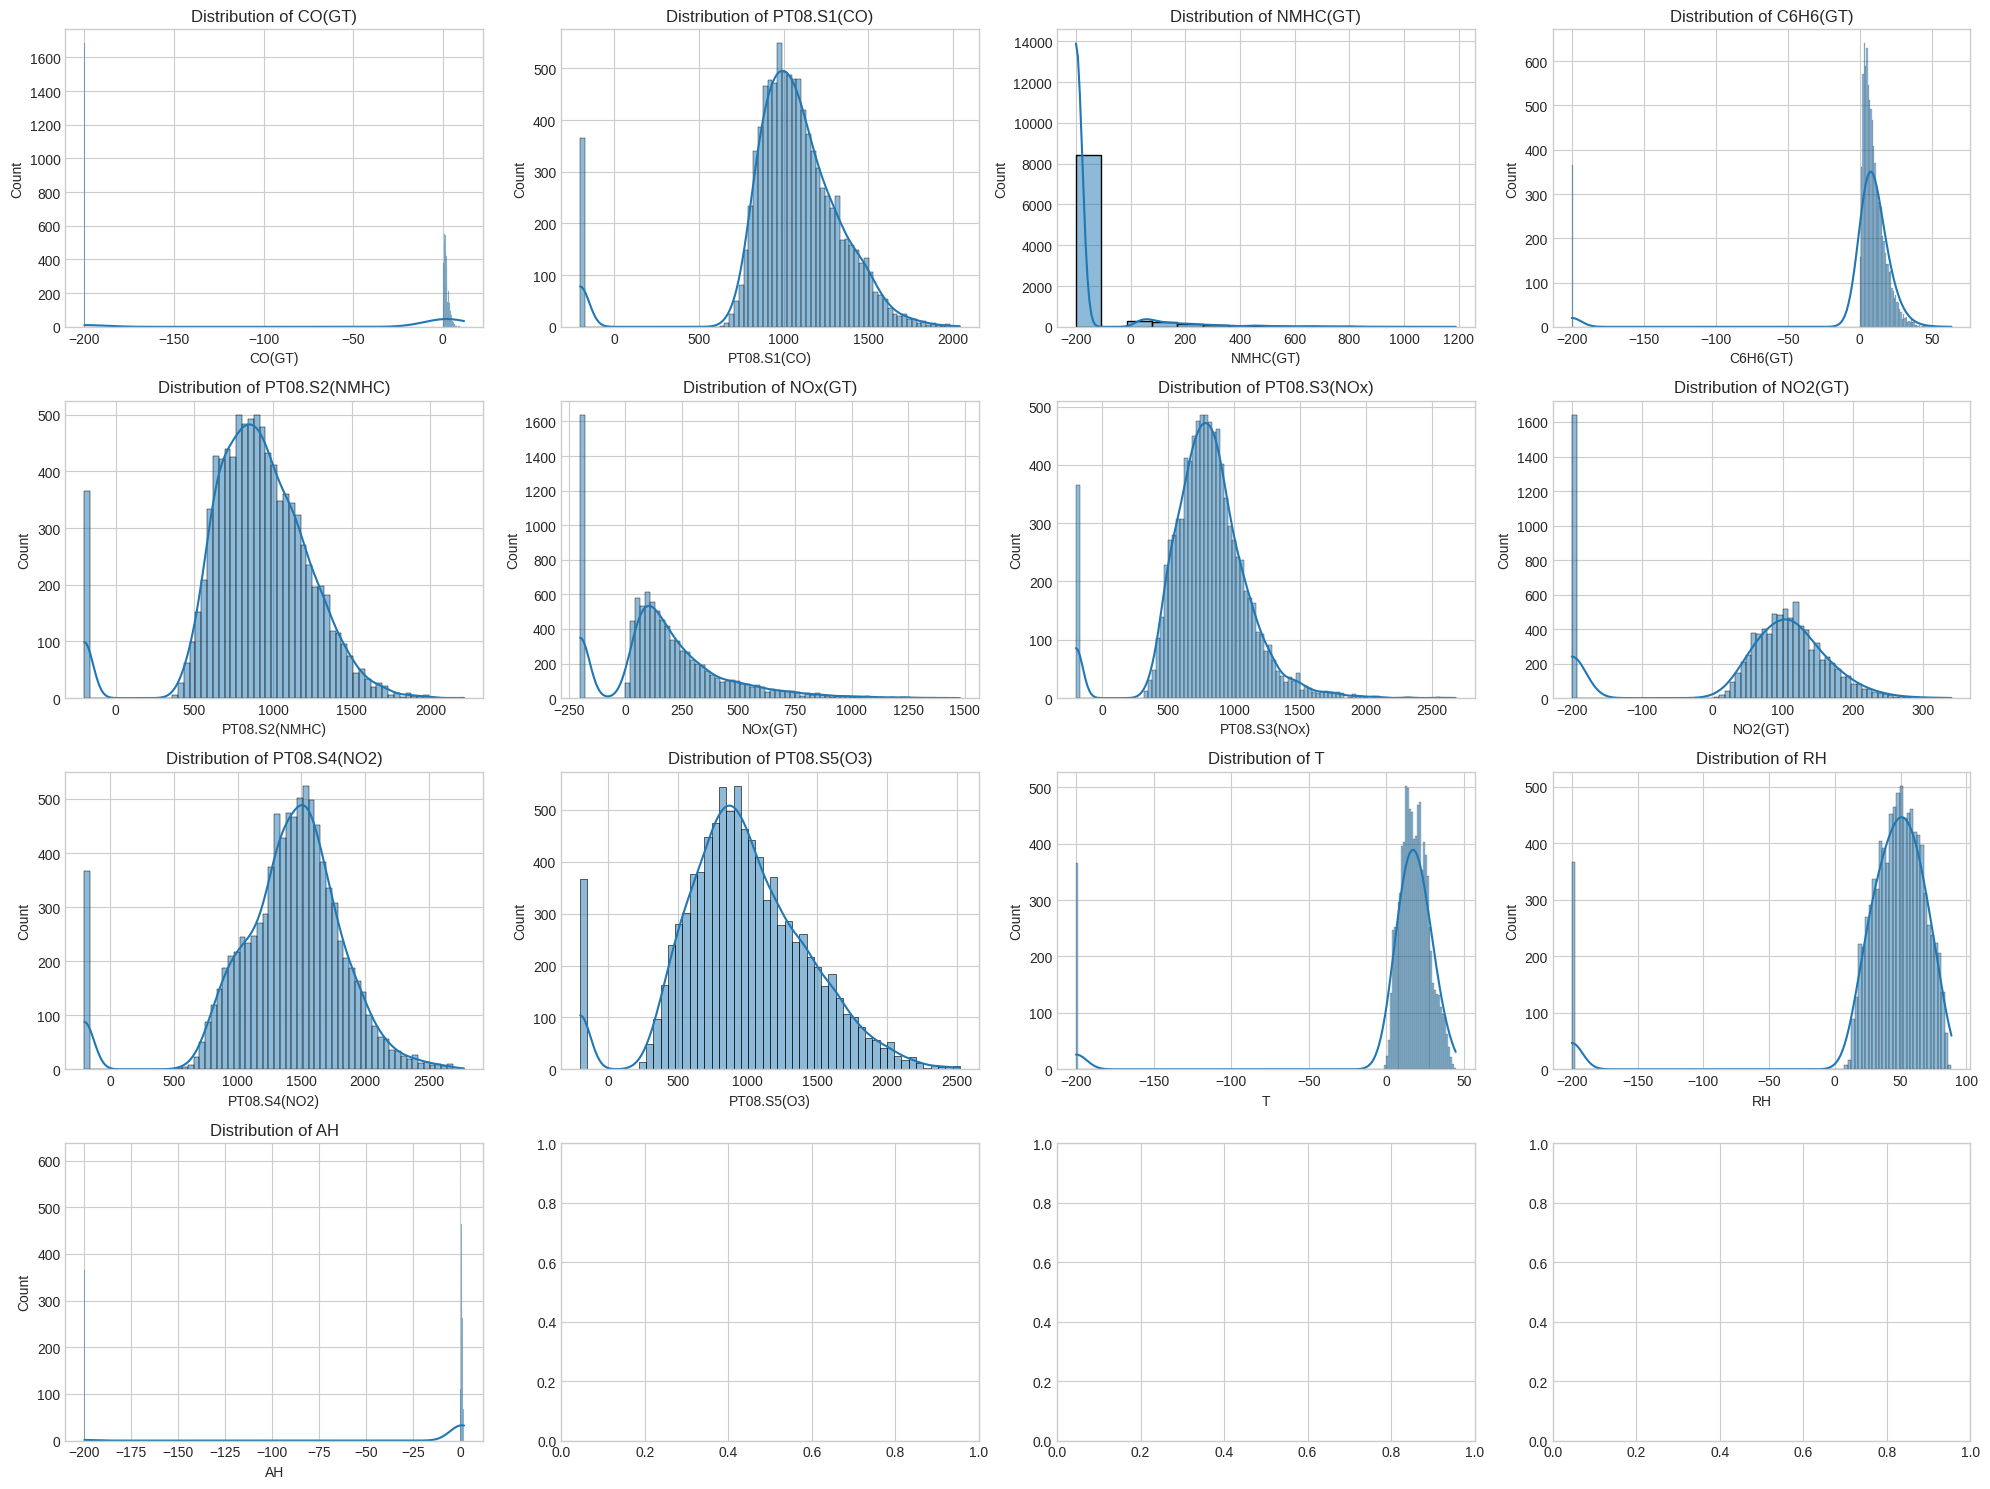

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

## Correlation Matrix

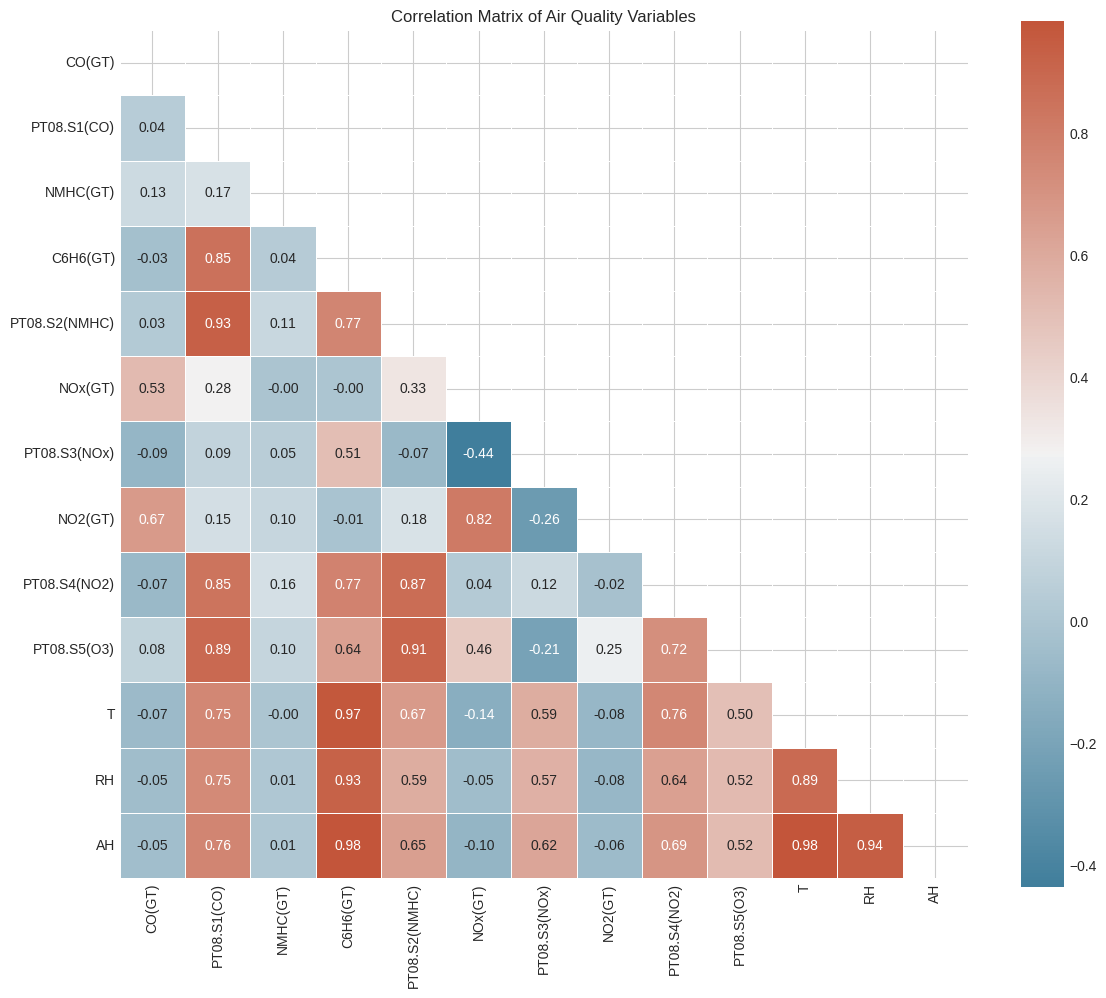

In [19]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Matrix of Air Quality Variables')
plt.tight_layout()
plt.show()

## Time Series Plots For Key Pollutants

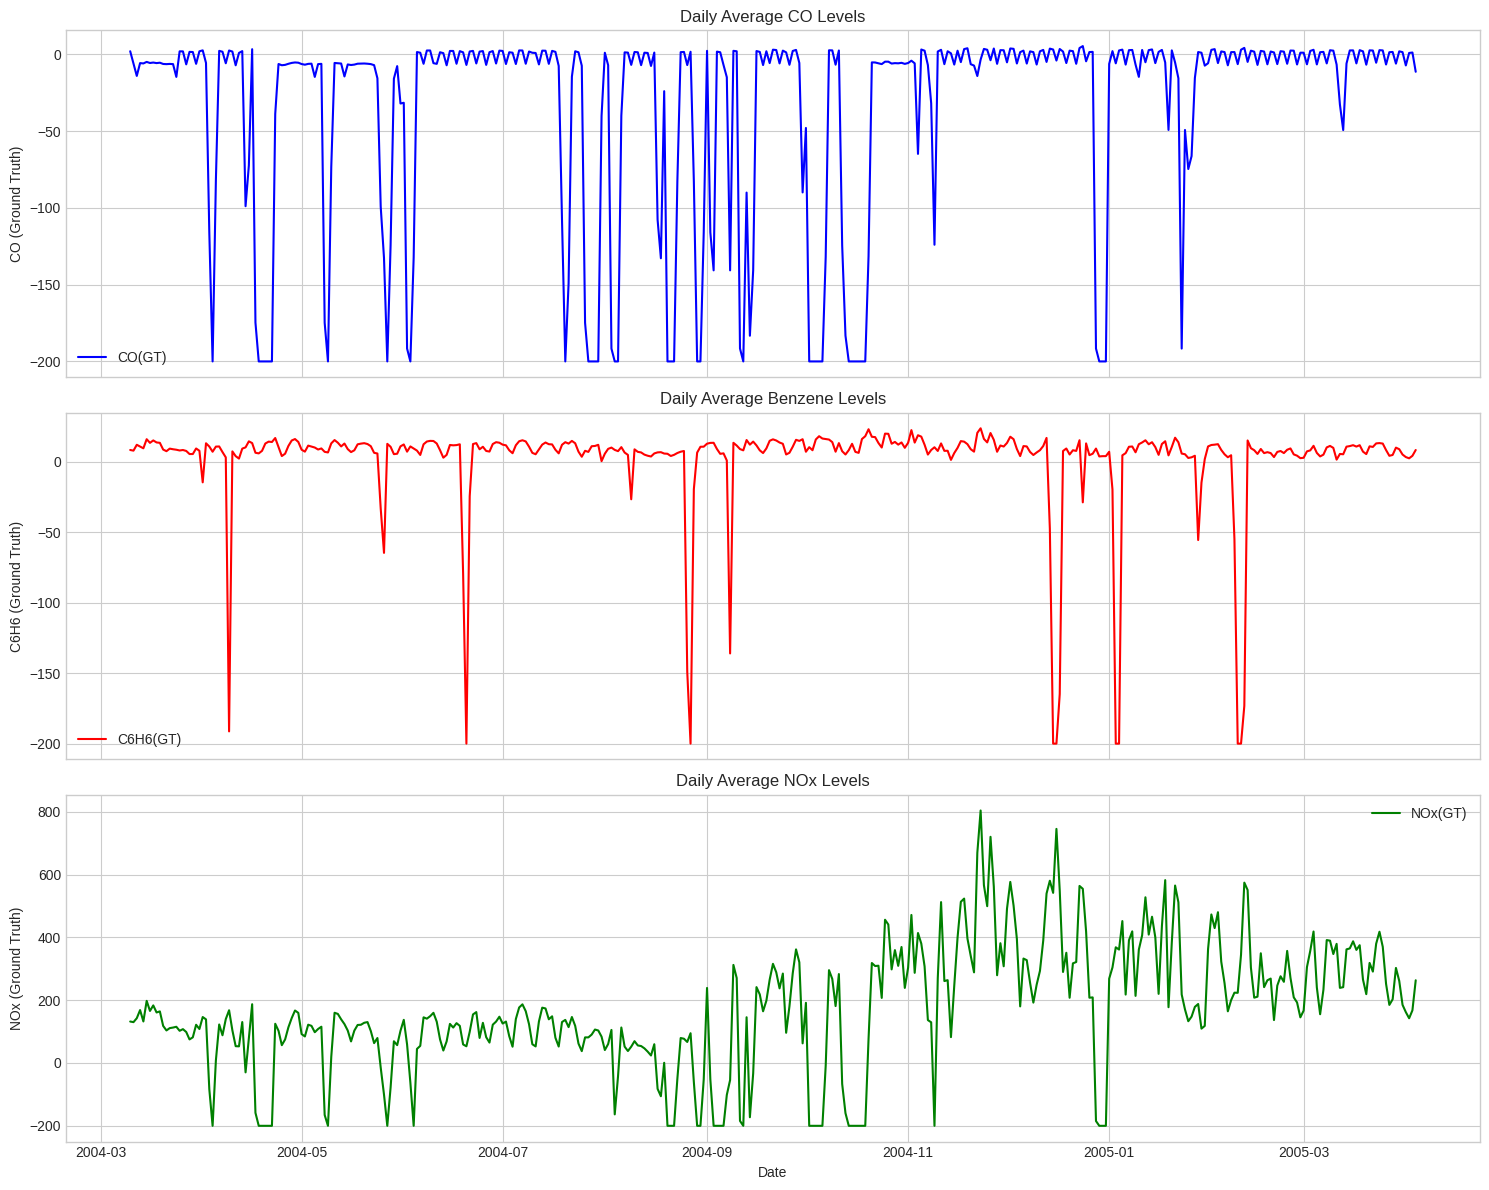

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# CO
axes[0].plot(daily_avg.index, daily_avg['CO(GT)'], label='CO(GT)', color='blue')
axes[0].set_ylabel('CO (Ground Truth)')
axes[0].set_title('Daily Average CO Levels')
axes[0].legend()

# Benzene
axes[1].plot(daily_avg.index, daily_avg['C6H6(GT)'], label='C6H6(GT)', color='red')
axes[1].set_ylabel('C6H6 (Ground Truth)')
axes[1].set_title('Daily Average Benzene Levels')
axes[1].legend()

# NOx
axes[2].plot(daily_avg.index, daily_avg['NOx(GT)'], label='NOx(GT)', color='green')
axes[2].set_ylabel('NOx (Ground Truth)')
axes[2].set_title('Daily Average NOx Levels')
axes[2].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

## Box Plots to Identify Outliers

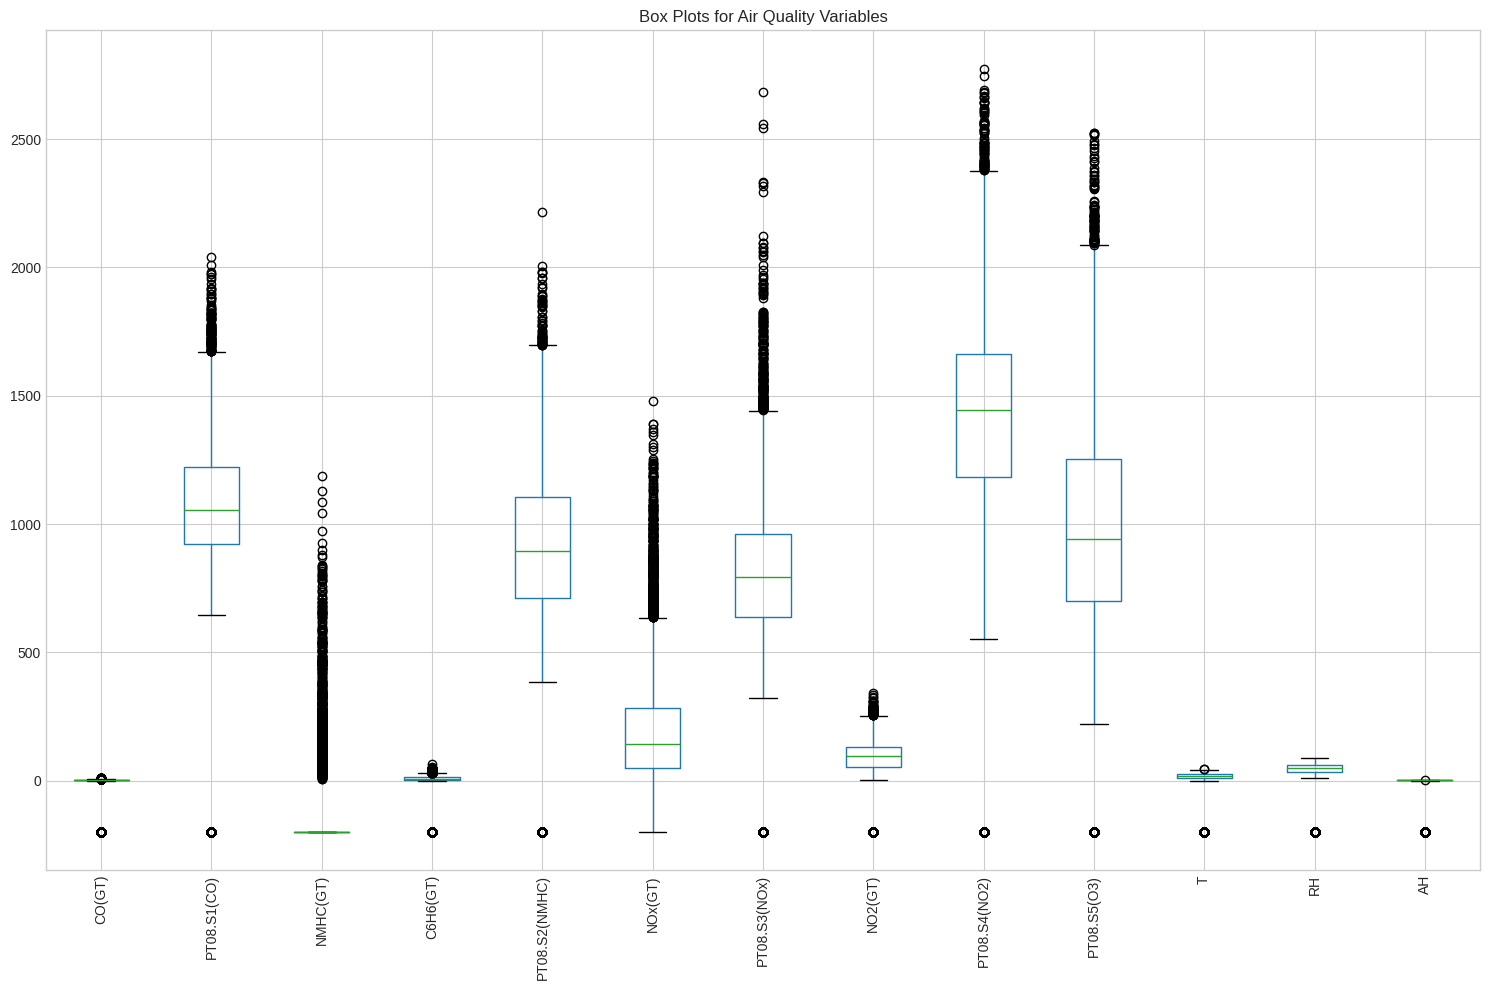

In [21]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title('Box Plots for Air Quality Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation with Weather Variables

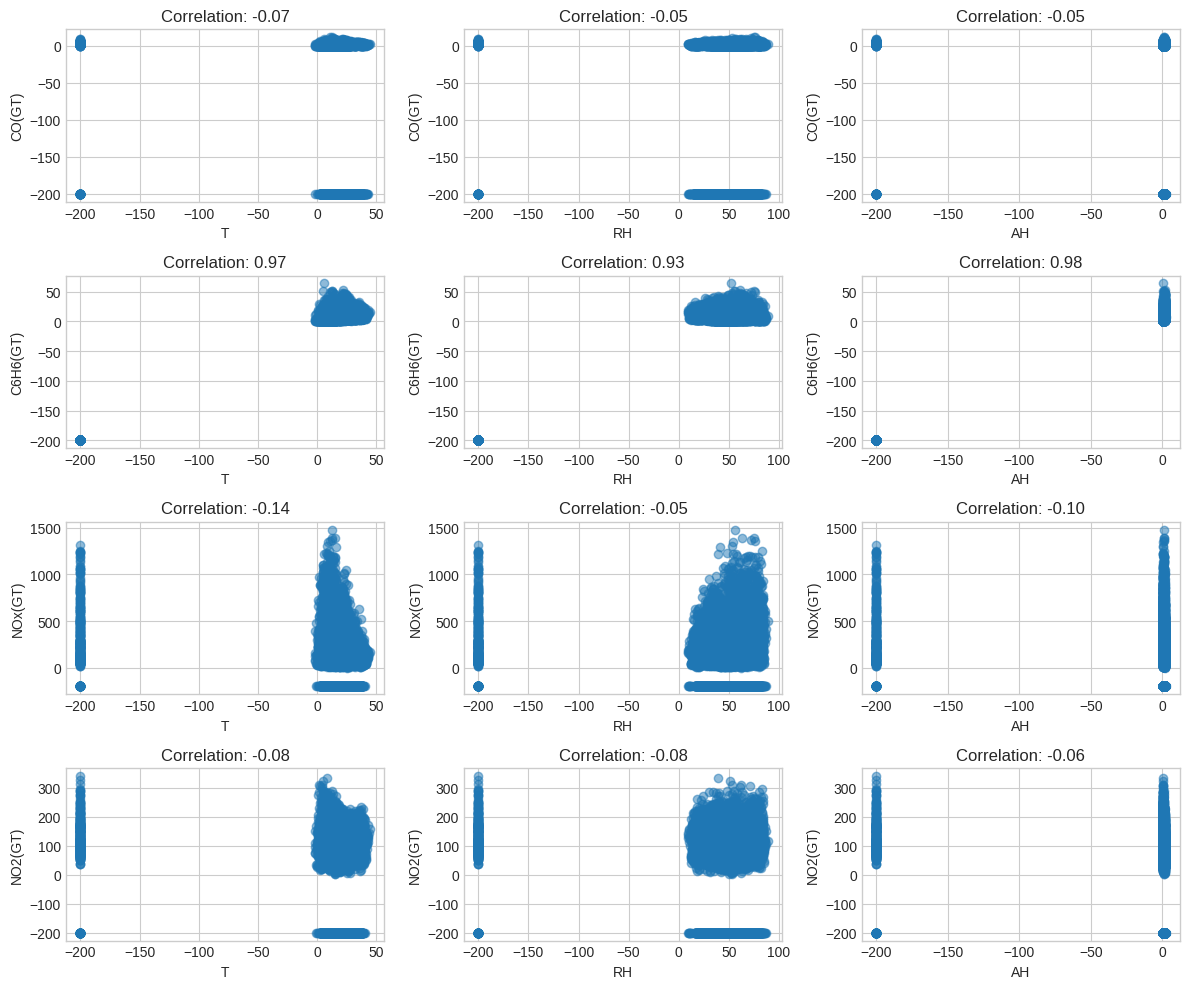

In [22]:
weather_vars = ['T', 'RH', 'AH']
pollutant_vars = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

plt.figure(figsize=(12, 10))
for i, pollutant in enumerate(pollutant_vars):
    for j, weather in enumerate(weather_vars):
        plt.subplot(len(pollutant_vars), len(weather_vars), i*len(weather_vars) + j + 1)
        plt.scatter(df[weather], df[pollutant], alpha=0.5)
        plt.xlabel(weather)
        plt.ylabel(pollutant)
        corr, _ = pearsonr(df[weather], df[pollutant])
        plt.title(f'Correlation: {corr:.2f}')

plt.tight_layout()
plt.show()

## Hourly Patterns (Average by Hour of Day)

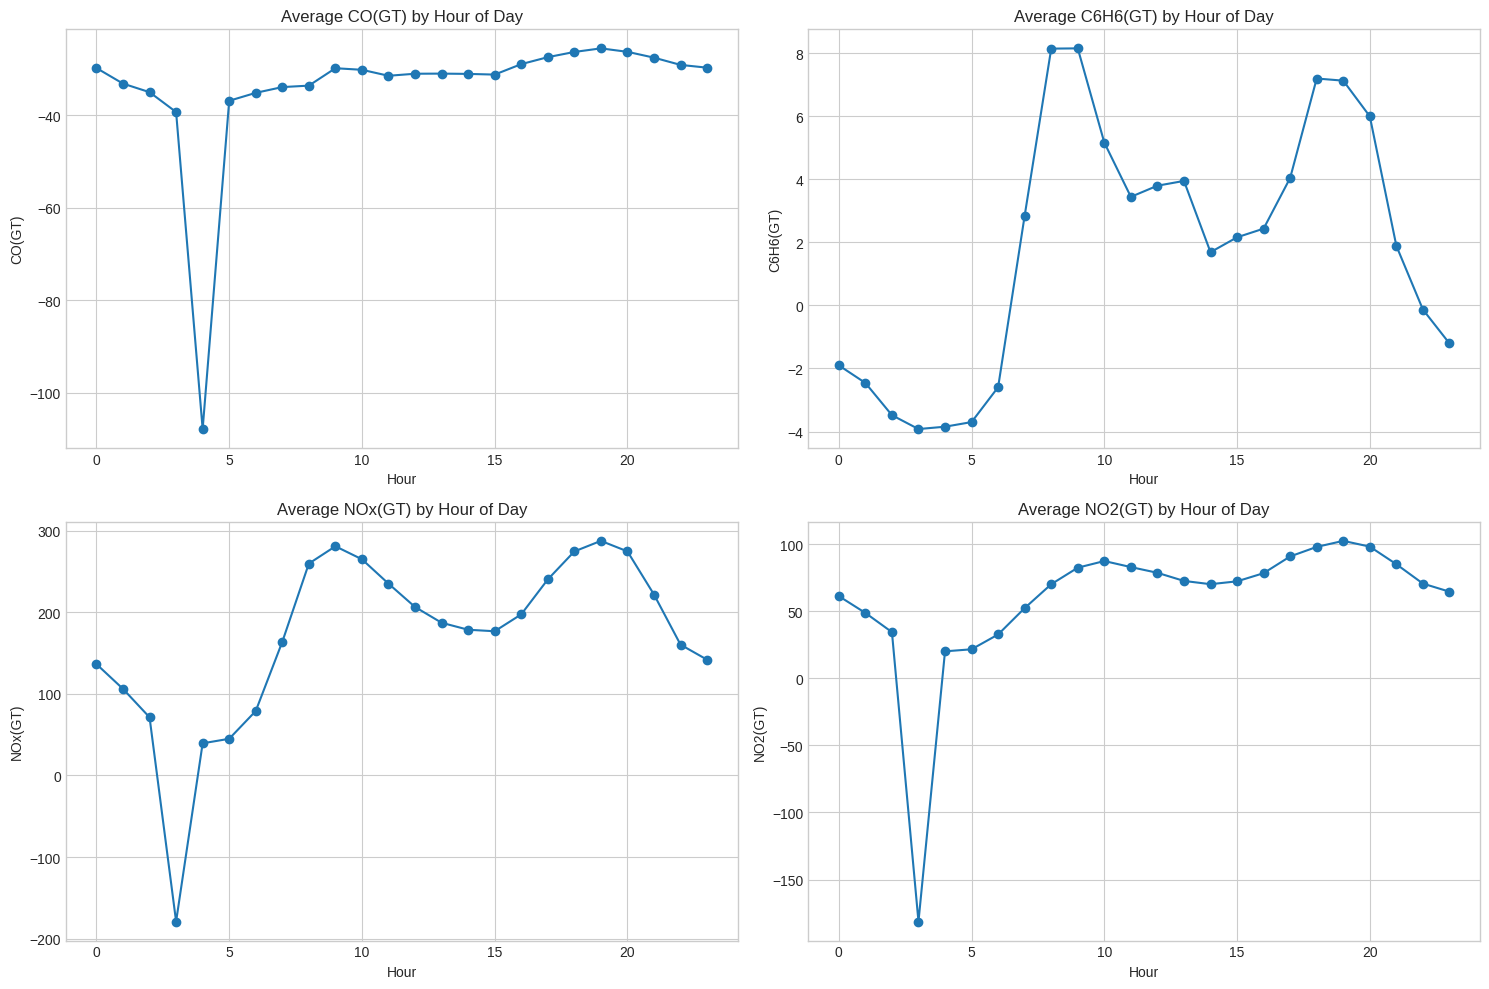

In [23]:
hourly_patterns = df.groupby(df.index.hour).mean()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], 1):
    plt.subplot(2, 2, i)
    plt.plot(hourly_patterns.index, hourly_patterns[col], marker='o')
    plt.title(f'Average {col} by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()

## Weekly Patterns (Average by Day of Week)

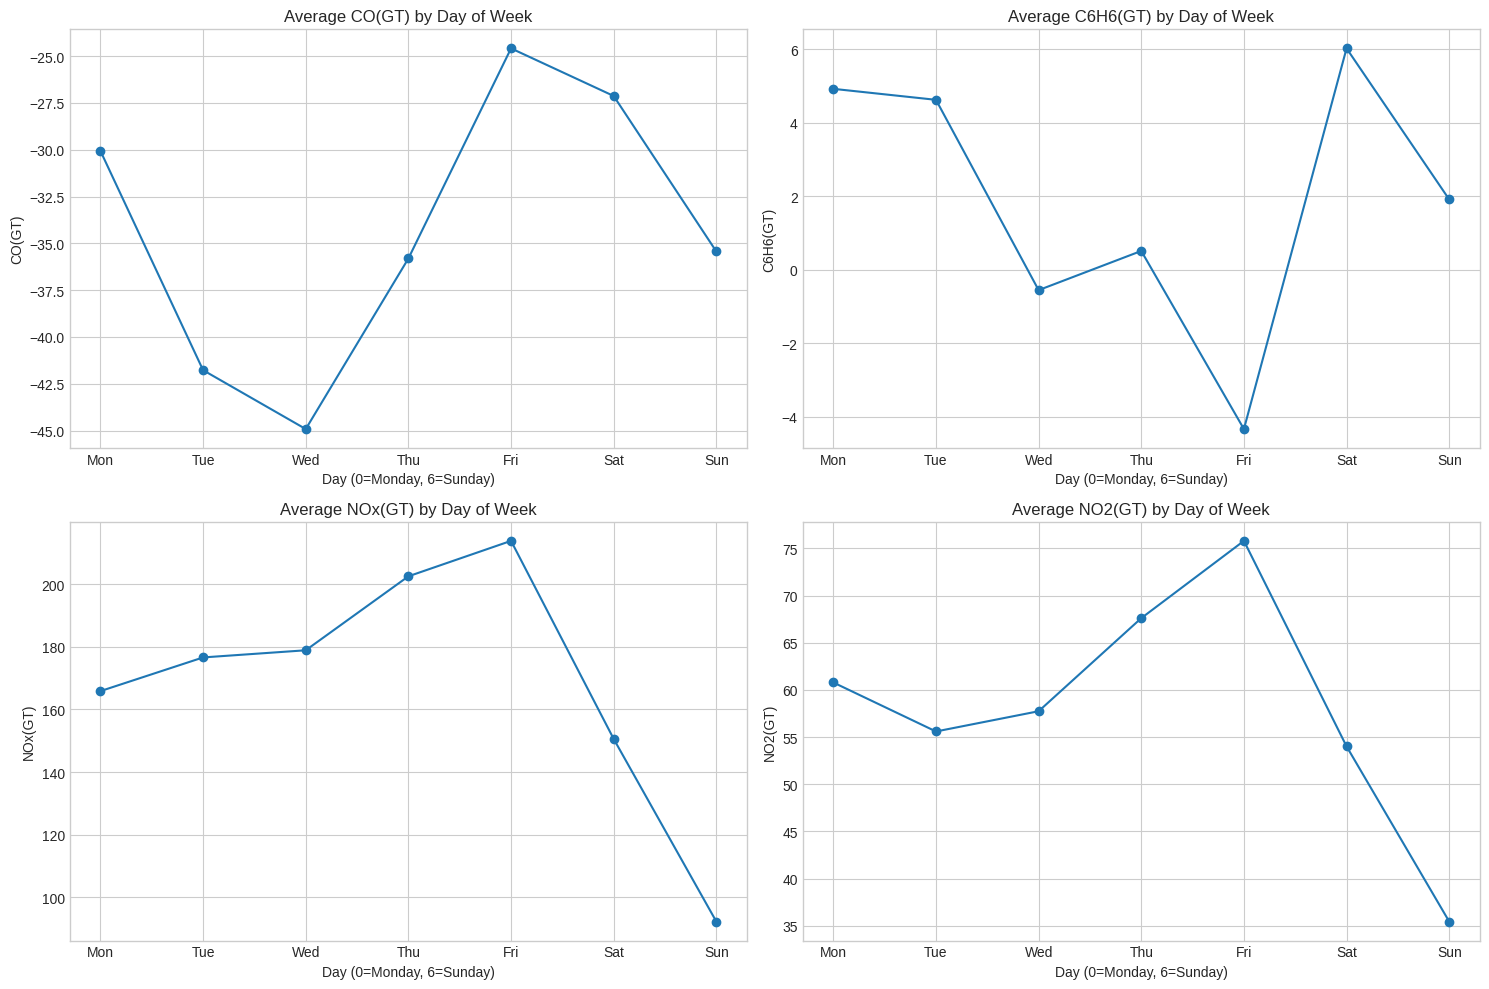

In [24]:
df['day_of_week'] = df.index.dayofweek
weekly_patterns = df.groupby('day_of_week').mean()

plt.figure(figsize=(15, 10))
for i, col in enumerate(['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], 1):
    plt.subplot(2, 2, i)
    plt.plot(weekly_patterns.index, weekly_patterns[col], marker='o')
    plt.title(f'Average {col} by Day of Week')
    plt.xlabel('Day (0=Monday, 6=Sunday)')
    plt.ylabel(col)
    plt.grid(True)
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

## Find Which Variables are Most Correlated With Each Pollutant

In [25]:
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

for target in target_pollutants:
    correlations = []
    for col in df.columns:
        if col != target:
            corr, p_value = pearsonr(df[target], df[col])
            correlations.append((col, corr, p_value))
    
    # Sort by absolute correlation value
    correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\nTop correlations with {target}:")
    for col, corr, p_value in correlations[:5]:
        print(f"{col}: r = {corr:.4f}, p = {p_value:.4e}")

# Print key findings
print("\nKey EDA Findings:")
print("1. Distributions of pollutants")
print("2. Temporal patterns in air quality")
print("3. Correlations between pollutants and weather variables")
print("4. Hourly and weekly patterns in pollutant concentrations")


Top correlations with CO(GT):
NO2(GT): r = 0.6711, p = 0.0000e+00
NOx(GT): r = 0.5265, p = 0.0000e+00
NMHC(GT): r = 0.1284, p = 1.1509e-35
PT08.S3(NOx): r = -0.0900, p = 2.7692e-18
PT08.S5(O3): r = 0.0803, p = 7.2519e-15

Top correlations with C6H6(GT):
AH: r = 0.9846, p = 0.0000e+00
T: r = 0.9714, p = 0.0000e+00
RH: r = 0.9251, p = 0.0000e+00
PT08.S1(CO): r = 0.8527, p = 0.0000e+00
PT08.S4(NO2): r = 0.7747, p = 0.0000e+00

Top correlations with NOx(GT):
NO2(GT): r = 0.8171, p = 0.0000e+00
CO(GT): r = 0.5265, p = 0.0000e+00
PT08.S5(O3): r = 0.4619, p = 0.0000e+00
PT08.S3(NOx): r = -0.4361, p = 0.0000e+00
PT08.S2(NMHC): r = 0.3313, p = 1.8111e-238

Top correlations with NO2(GT):
NOx(GT): r = 0.8171, p = 0.0000e+00
CO(GT): r = 0.6711, p = 0.0000e+00
PT08.S3(NOx): r = -0.2562, p = 3.5926e-140
PT08.S5(O3): r = 0.2534, p = 4.4884e-137
PT08.S2(NMHC): r = 0.1765, p = 2.4411e-66

Key EDA Findings:
1. Distributions of pollutants
2. Temporal patterns in air quality
3. Correlations between pollu

## Model Implementation and Evaluation

Choose one target pollutant for this example

In [26]:
target = 'C6H6(GT)'  # Benzene concentration

 Define target variables to predict

In [27]:
target_pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

Select features: sensor readings, weather variables, and time features

In [28]:
features = [col for col in df_features.columns if col not in target_pollutants]

Prepare X and y

In [29]:
X = df_features[features]
y = df_features[target]

Split data for training and testing (using time-based split)

In [30]:
# We'll use the first 70% of the data for training, the remaining 30% for testing
train_size = int(0.7 * len(df_features))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")

Training data size: (6549, 13)
Testing data size: (2808, 13)


Scale the features

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize Models

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

Train and evaluate each model

In [33]:
results = {}

for name, model in models.items():
    # Train the model
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }
    
    print(f"{name} Results:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²: {r2:.4f}")


Training Linear Regression...
Linear Regression Results:
  MSE: 15.9253
  RMSE: 3.9906
  MAE: 3.6326
  R²: 0.9949

Training Decision Tree...
Decision Tree Results:
  MSE: 0.0021
  RMSE: 0.0462
  MAE: 0.0115
  R²: 1.0000

Training Random Forest...
Random Forest Results:
  MSE: 0.0032
  RMSE: 0.0565
  MAE: 0.0128
  R²: 1.0000


Plot actual vs predicted values for each model

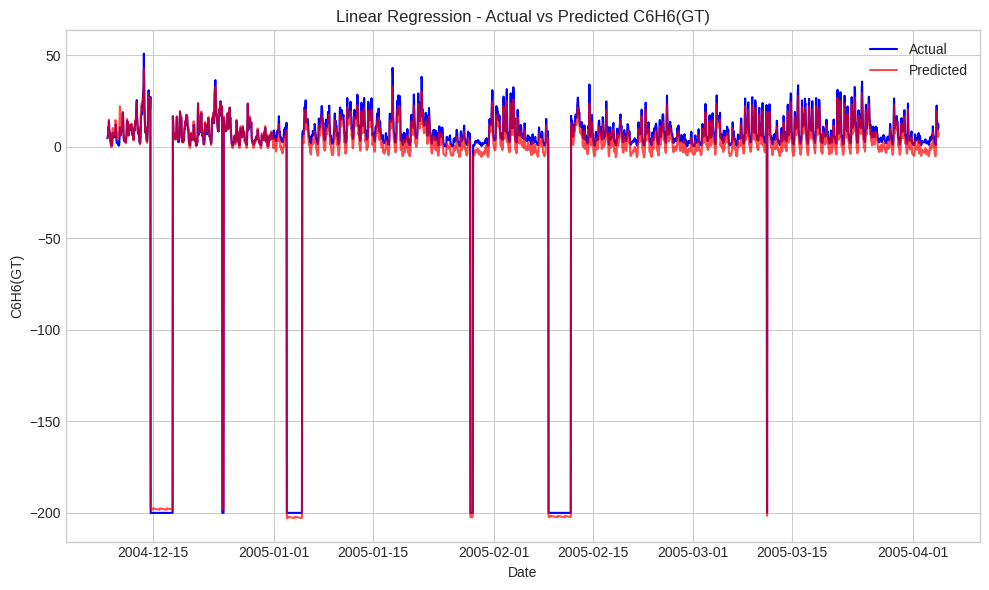

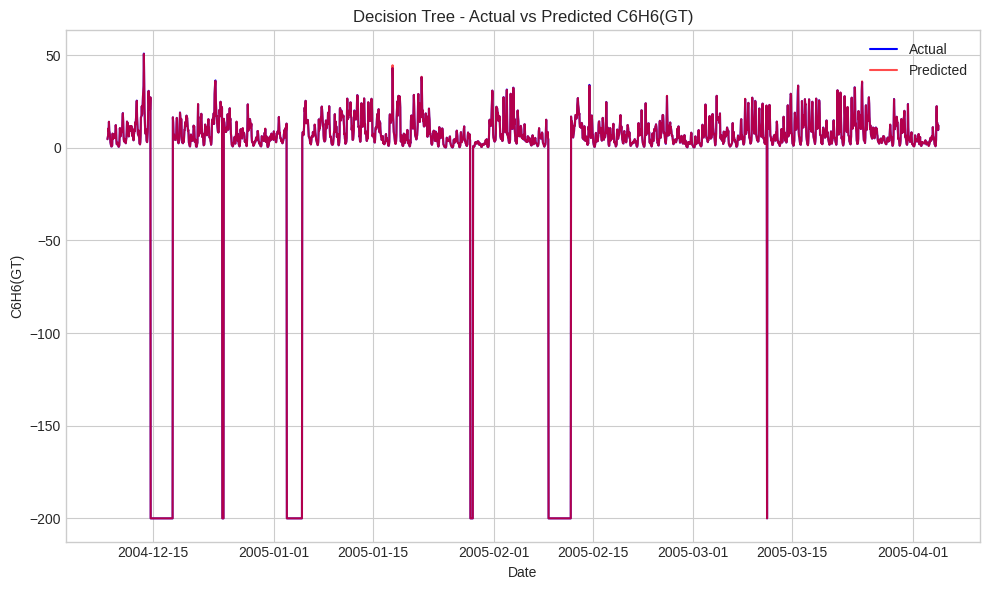

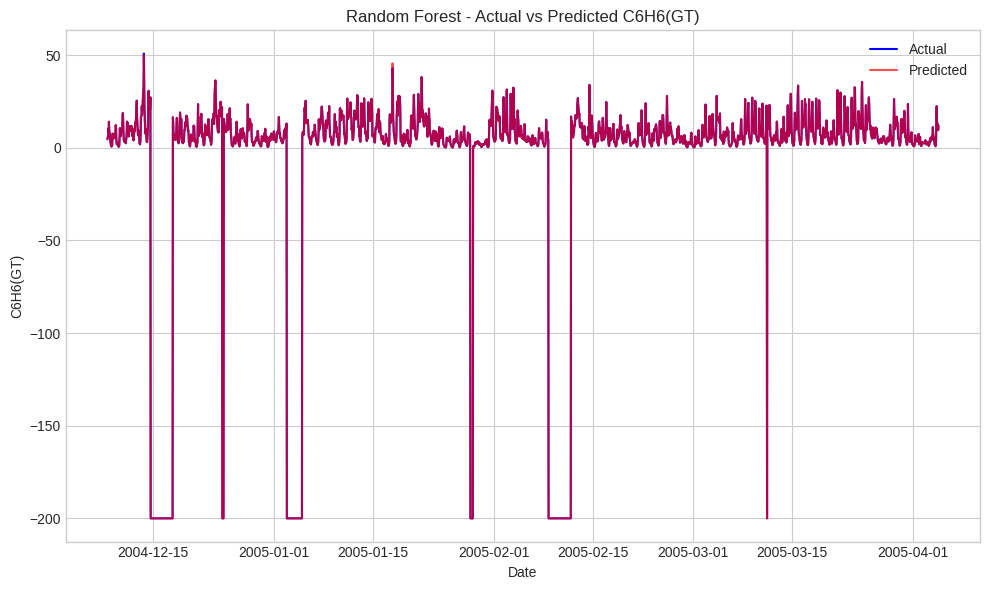

In [34]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted', color='red', alpha=0.7)
    plt.title(f'{name} - Actual vs Predicted {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()

Feature importance for Random Forest

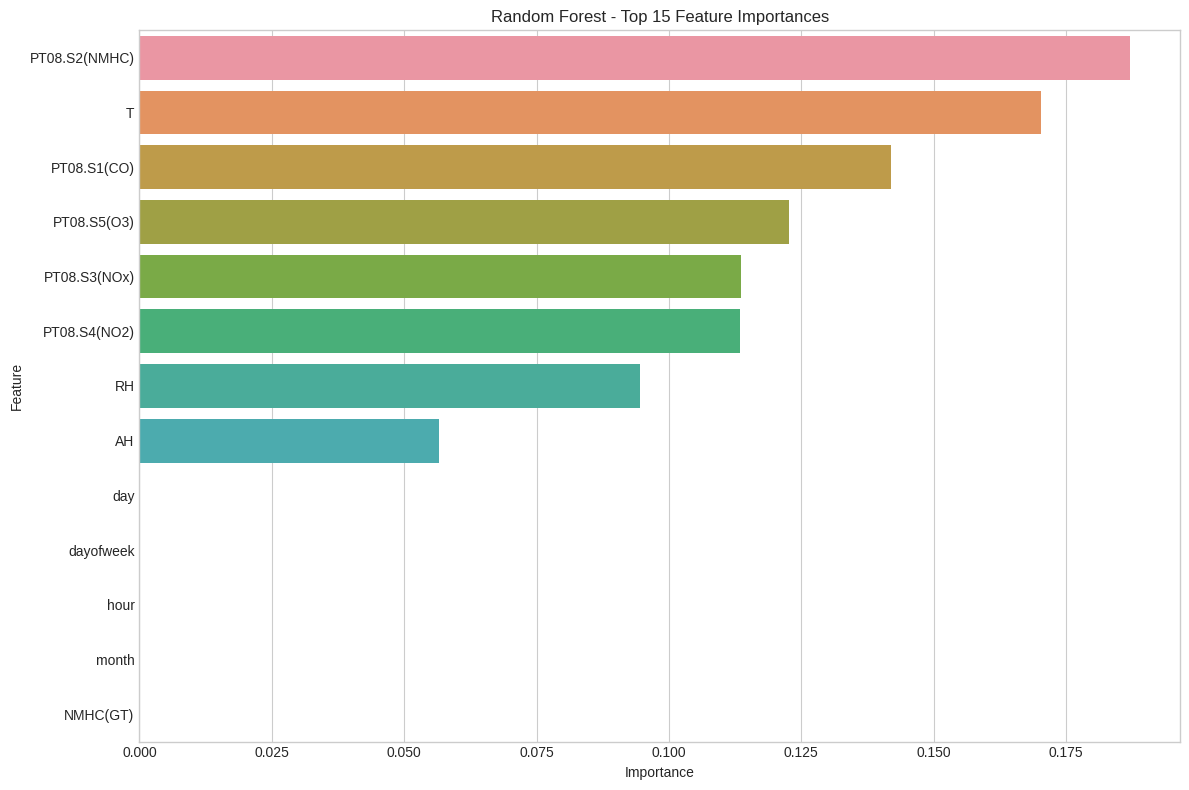

In [35]:
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Random Forest - Top 15 Feature Importances')
plt.tight_layout()
plt.show()

### Compare Model Performances


Model Comparison:
                         MSE      RMSE       MAE        R²
Linear Regression  15.925267  3.990647  3.632564  0.994945
Decision Tree       0.002137  0.046225  0.011538  0.999999
Random Forest       0.003195  0.056524  0.012759  0.999999


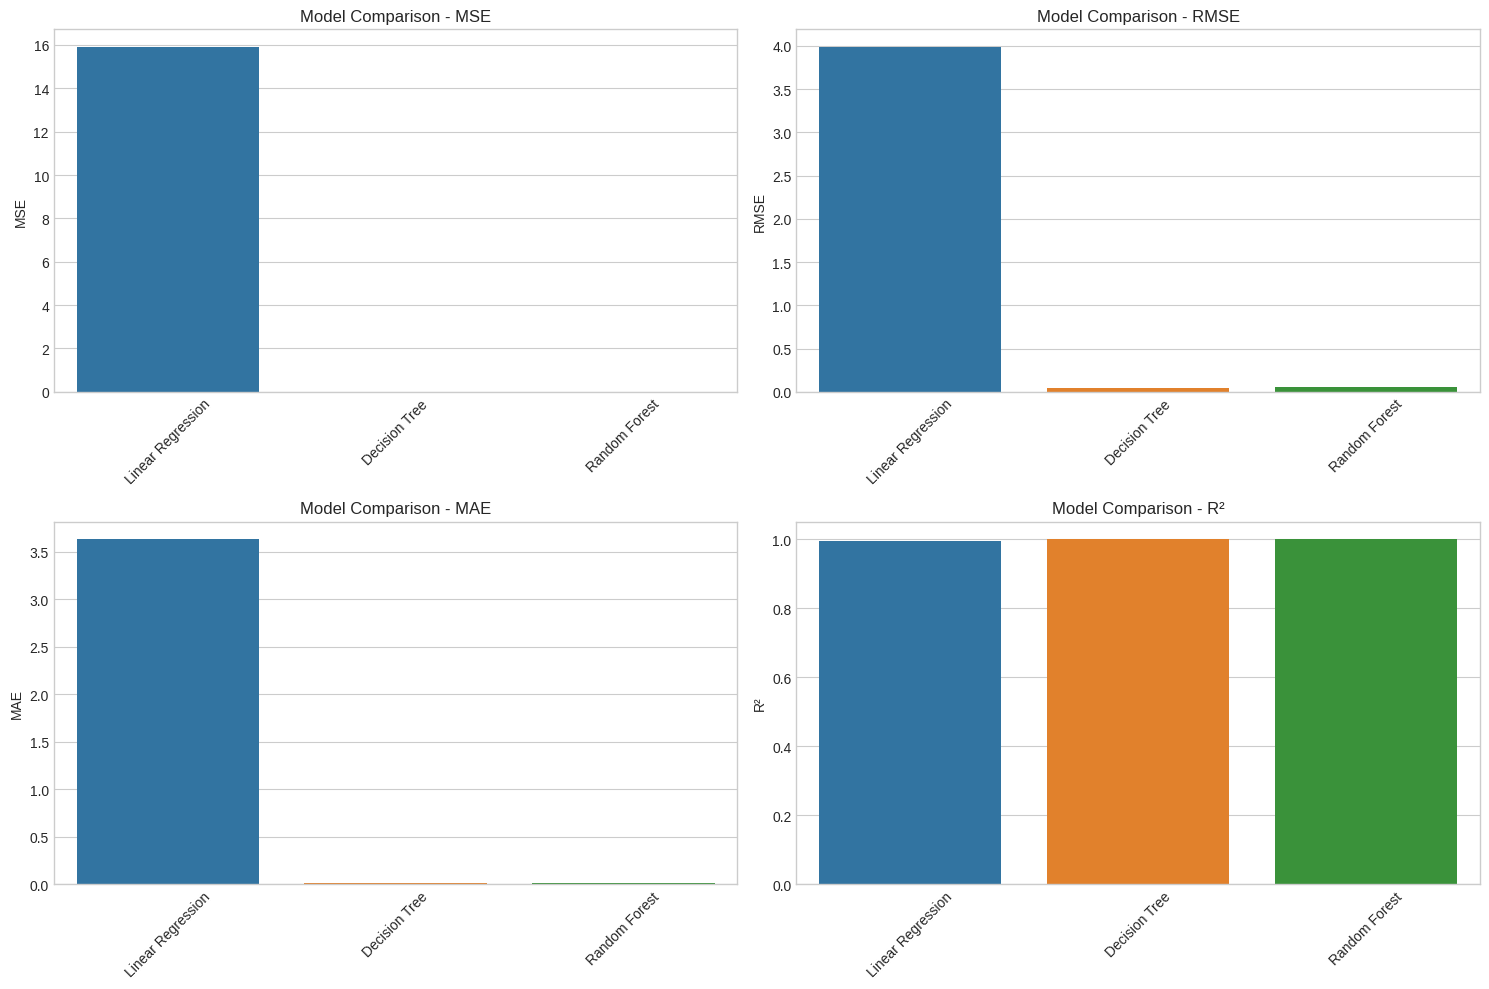

In [36]:
# Compare model performances
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
model_comparison = pd.DataFrame(index=models.keys(), columns=metrics)

for model_name, metrics_dict in results.items():
    for metric, value in metrics_dict.items():
        model_comparison.loc[model_name, metric] = value

print("\nModel Comparison:")
print(model_comparison)

# Create a bar chart to compare model performance
plt.figure(figsize=(15, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    ax = sns.barplot(x=model_comparison.index, y=model_comparison[metric])
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.ylabel(metric)
    
plt.tight_layout()
plt.show()

# Air Quality Model Performance Comparison Report

## Overview

The analysis compared three different machine learning models for air quality prediction. The models were evaluated using a time-based split of the dataset, with 70% used for training and 30% for testing.

## Models Evaluated

- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor

## Performance Metrics

| Model | MSE | RMSE | MAE | R² |
|-------|-----|------|-----|-----|
| Linear Regression | 15.925267 | 3.990647 | 3.632564 | 0.994945 |
| Decision Tree | 0.002137 | 0.046225 | 0.011538 | 0.999999 |
| Random Forest | 0.003195 | 0.056524 | 0.012759 | 0.999999 |

## Key Findings

1. **Decision Tree Performance**: The Decision Tree model demonstrated exceptional performance with the lowest error metrics (MSE: 0.002137, RMSE: 0.046225, MAE: 0.011538) and near-perfect R² score (0.999999).

2. **Random Forest Performance**: The Random Forest model performed almost as well as the Decision Tree, with slightly higher error metrics (MSE: 0.003195, RMSE: 0.056524, MAE: 0.012759) but still achieving a near-perfect R² score (0.999999).

3. **Linear Regression Limitations**: While still showing strong predictive capability with an R² of 0.994945, the Linear Regression model had significantly higher error metrics compared to the tree-based models (MSE: 15.925267, RMSE: 3.990647, MAE: 3.632564).

## Analysis

The exceptionally high R² values (0.999999) for both tree-based models suggest they have almost perfectly captured the patterns in the test data. These near-perfect scores warrant further investigation:

1. The models may be overfitting to the data, particularly the Decision Tree which is prone to this issue.
2. There might be a strong correlation between features and the target variable that makes prediction unusually accurate.
3. The time-based split might have resulted in similar patterns between training and testing periods.

The substantially higher error rates for Linear Regression indicate that the relationships between the features and target variable are likely non-linear, which the tree-based models can capture more effectively.